# Valores Faltantes NaN

Es comun encontrar valores faltantes en los conjuntos de datos, los cuales suelen expresarse como "NaN" (Not a Number) o como "NA" (Not Available),
aunque tambien pueden apaecer de otras maneras ("NaT" para Not a Time, "None", ect.). Muchas librerias de aprendizaje automatico requieren datos completos, sin valores vacios. Por ello, es muy importante aprender a detectarlos y, sobre todo, aprender a rellenarlos o eliminarlos cuando sea necesario.

En pandas, los NaN se interpretan como valores de tipo float, por lo que en la columna de enteros con al menos un NaN, se transformara en una columna de tipo float.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dow_jones_index.data')
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [3]:
df.dtypes

quarter                                 int64
stock                                  object
date                                   object
open                                   object
high                                   object
low                                    object
close                                  object
volume                                  int64
percent_change_price                  float64
percent_change_volume_over_last_wk    float64
previous_weeks_volume                 float64
next_weeks_open                        object
next_weeks_close                       object
percent_change_next_weeks_price       float64
days_to_next_dividend                   int64
percent_return_next_dividend          float64
dtype: object

# 1 Detectar valores faltantes

## ¿Hay algun NaN en el DataFrame?

In [4]:
respuesta = df.isnull().values.any()
# isnull() indica si el valor es nulo con un True y False si no lo es
# values solo nos devuelve los valores en este caso seria True y False
# any() solo devuelve True si en alguna columna encuentra algun valor faltante, suficiente para saber si hay o no hay
print('¿Hay algun valor NaN en el DataFrame: {}'.format(respuesta))

¿Hay algun valor NaN en el DataFrame: True


## ¿En que columnas hay NaN?

In [5]:
df.isnull().any()

quarter                               False
stock                                 False
date                                  False
open                                  False
high                                  False
low                                   False
close                                 False
volume                                False
percent_change_price                  False
percent_change_volume_over_last_wk     True
previous_weeks_volume                  True
next_weeks_open                       False
next_weeks_close                      False
percent_change_next_weeks_price       False
days_to_next_dividend                 False
percent_return_next_dividend          False
dtype: bool

missingno es una libreria que no esta incorporada a python por lo que hay que instalarla
- pip install missingno

Esta libreria nos sirve para poder ver de una manera grafica los valores faltantes y como estan distribuidos en la columna.

<Axes: >

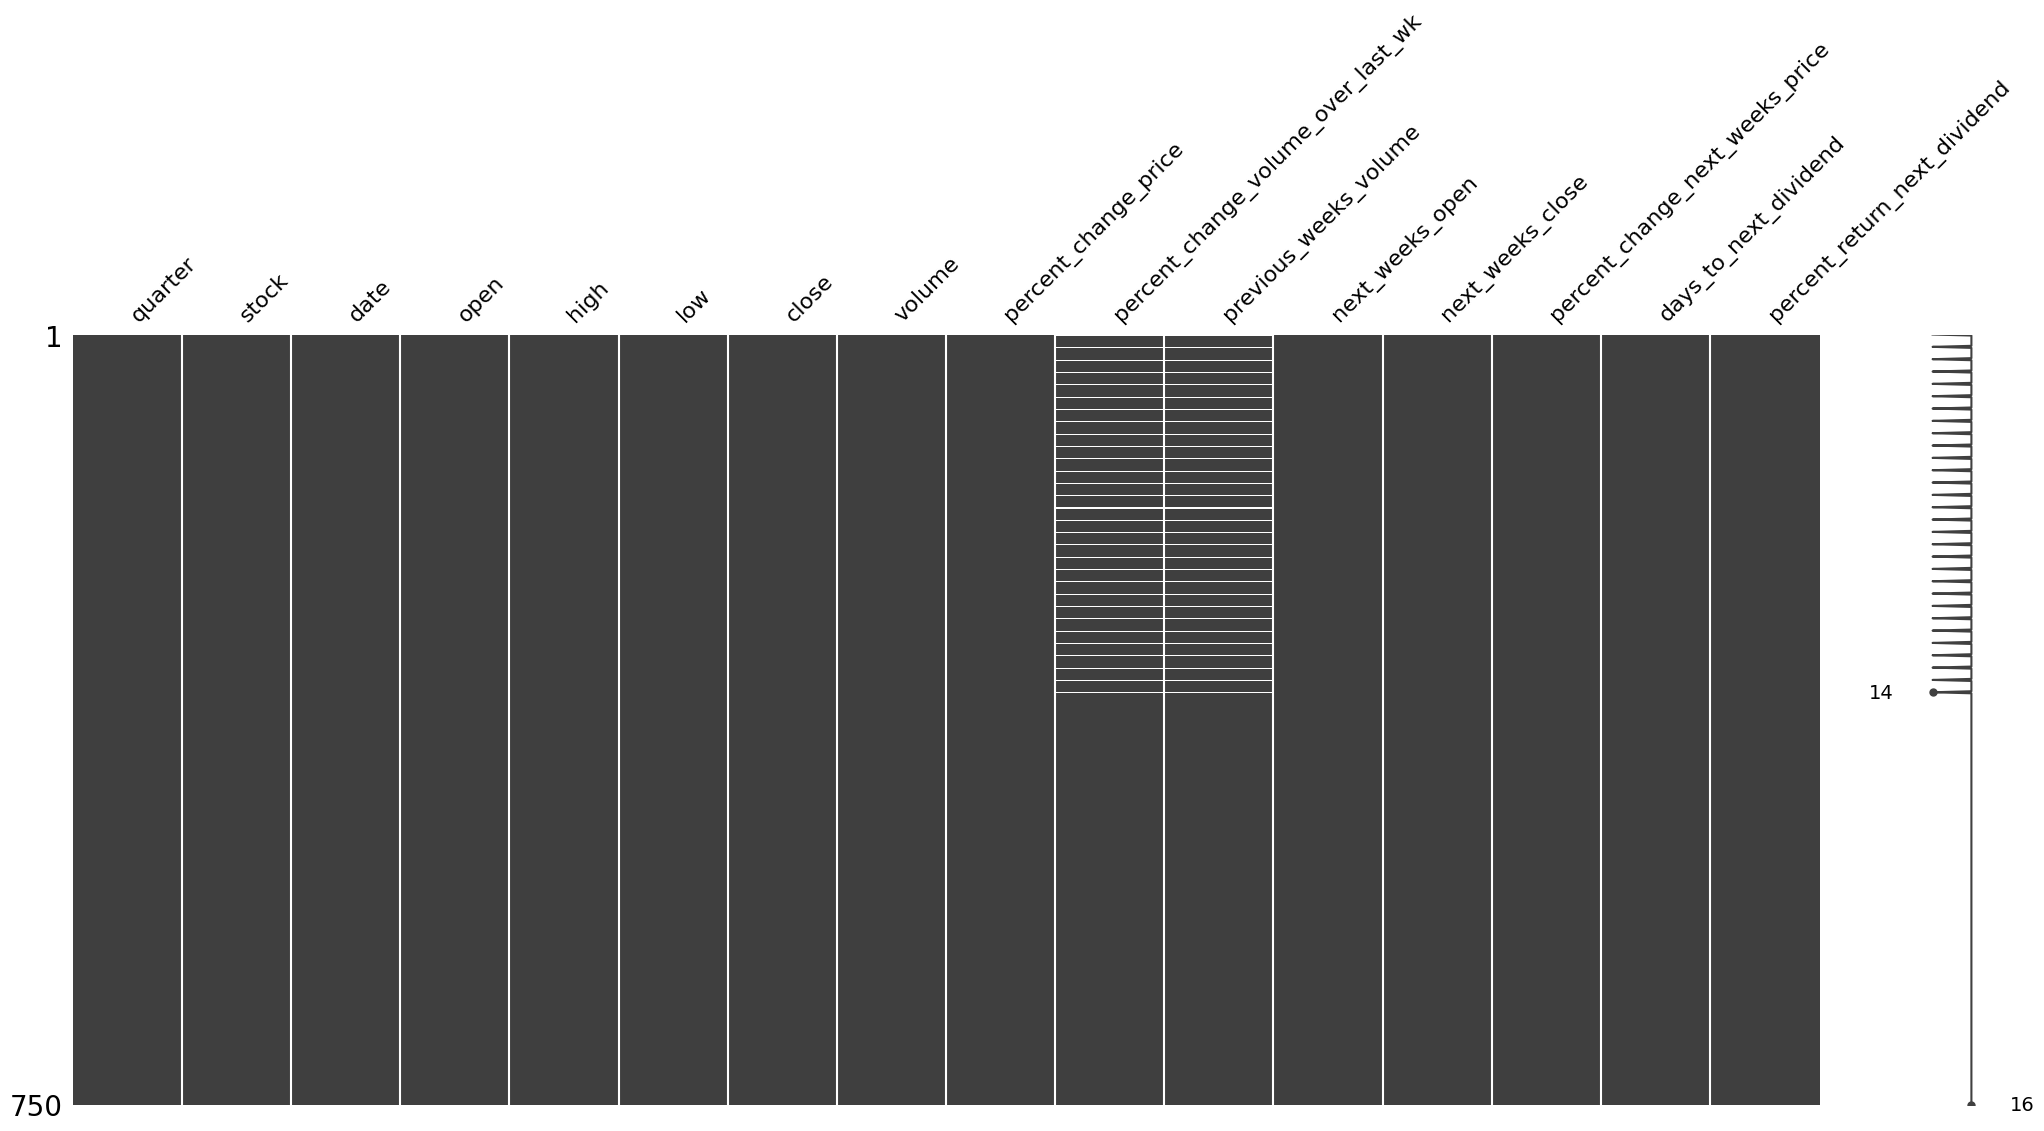

In [6]:
import missingno as msno
msno.matrix(df)

## ¿Cuantos NaN hay en una columna

In [7]:
df.isnull().sum()

quarter                                0
stock                                  0
date                                   0
open                                   0
high                                   0
low                                    0
close                                  0
volume                                 0
percent_change_price                   0
percent_change_volume_over_last_wk    30
previous_weeks_volume                 30
next_weeks_open                        0
next_weeks_close                       0
percent_change_next_weeks_price        0
days_to_next_dividend                  0
percent_return_next_dividend           0
dtype: int64

## Extraccion de filas con NaN

In [8]:
filas_nan = df[df.isnull().any(1)]
filas_nan.head()

C:\Users\aleja\AppData\Local\Temp\ipykernel_10596\1867921263.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  filas_nan = df[df.isnull().any(1)]


,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.792670,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
12,1,AXP,1/7/2011,$43.30,$45.60,$43.11,$44.36,45102042,2.448040,NaN,NaN,$44.20,$46.25,4.638010,89,0.405771
24,1,BA,1/7/2011,$66.15,$70.10,$66.00,$69.38,36258120,4.882840,NaN,NaN,$69.42,$70.07,0.936330,33,0.605362
36,1,BAC,1/7/2011,$13.85,$14.69,$13.80,$14.25,1453438639,2.888090,NaN,NaN,$14.17,$15.25,7.621740,54,0.070175
48,1,CAT,1/7/2011,$94.38,$94.81,$92.30,$93.73,24135903,-0.688705,NaN,NaN,$93.21,$94.01,0.858277,11,0.469433


## Extraccion de columnas con NaN

In [9]:
filas_nan = df.columns[df.isnull().any()]
filas_nan

Index(['percent_change_volume_over_last_wk', 'previous_weeks_volume'], dtype='object')

## Posiciones de los NaN

In [10]:
filas_nan.index #Volvi a ejecutar la penultima antes de esta para ejecutar esto

AttributeError: 'Index' object has no attribute 'index'

# 2 Eliminar filas y/o columnas con valores faltantes

Para evitar el problema de los valores faltantes, la opcion mas simple consiste en eliminar las columnas que tienen valores faltantes y dejar solo aquillas que estan completas. Sin embargo, este enfoque puede provocar que el modelo pierda informacion valiosa.

Para eliminar filas y columnas con valores faltantes, es muy util dropna() de pandas.

axis = 0 para filas, 1 para columnas

## Eliminar filas con al menos un NaN

Uno de los parametros que recibe dropna() es ***how*** a este parametro le podemos pasar lo siguiente
- 'any' esta opcion esta por defecto no es necesario indicarla, lo que hace es que eliminara la fila siempre y cuando exista un valor NaN en alguno de sus atributos.

- 'all' esta opcion nos permite eliminar la fila siempre y cuando se cumpla la condicion de que todos los atributos sean valores NaN

In [11]:
print('Registros en el dataframe:',len(df))
print('Usando "any" :',len(df.dropna(how='any'))) # Mientras el valor de un atributo de este registro sea NaN se eliminara el registro completo
print('Usando "all":', len(df.dropna(how='all'))) # Solo aquellas en las que todos los atributos del registro son valores NaN como no hay ninguna no pasa nada


Registros en el dataframe: 750
Usando "any" : 720
Usando "all": 750


## Mantener filas con, al menos, un numero concreto de valores no vacios

Tal vez te estaras preguntando, ¿Habra una manera de que pueda borrar los registros mientras exista una cantidad determinada de valores NaN en la fila? la respuesta es si con ***thresh***, solo hay que indicarle cuantas columnas al menos deben de contener datos.


In [12]:
print('Numero de columnas:',len(df.columns))
print('Usando thresh:',len(df.dropna(thresh=15)))

Numero de columnas: 16
Usando thresh: 720


## Eliminar filas que contengan NaN en ciertas columnas

Si no queremos ver si en todo el DataFrame hay algun valor nulo se puede usar parametro ***subset*** en el hay que indicarle una lista con el nombre de las columnas en las que quiero se fije

In [13]:
print('Columnas con valores nulos:',list(df.columns[df.isnull().any()]))
print('Usando subset:',len(df.dropna(subset=['previous_weeks_volume'])))

Columnas con valores nulos: ['percent_change_volume_over_last_wk', 'previous_weeks_volume']
Usando subset: 720


## Eliminar columnas que tengan como minimo un valor NaN
El parametro ***axis*** sirve para indicar en que eje queremos trabajar, por defecto esta en 0 y este significa el eje de las filas, para trabajar con el eje de las columnas hay que poner 1 como valor, tambien se puede poner "columns"

In [14]:
print('Total de columnas:',len(df.columns))
print('Total de columnas despues de borrar:',len(df.dropna(axis=1).columns))
print('Total de columnas despues de borrar:',len(df.dropna(axis="columns").columns))

Total de columnas: 16
Total de columnas despues de borrar: 14
Total de columnas despues de borrar: 14


## dropna(inplace=True)
Habras notado que en los ejemplos anteriores he utilizado el DataFrame (df) sin problema y eso que me la pase borrando filas, esto es porque dropna no elimina los datos en el lugar, es decir solo cuando utilizo la funcion, para que en verdad se eliminen esos datos existe el parametro ***inplace*** por defecto esta en False pero si quieres borrar los datos con valores nulos desde el inicio y perder los datos usa ***dropna(inplace=True)***.

## Extraer filas sin valores NaN

Si no quieres eliminar los valores puedes solo extraerlos con ***notna()***

In [15]:
len(df[df["previous_weeks_volume"].notna()])

720

# Relleno de valores faltantes
El metodo de imputacion rellena los valores faltantes con algun valor, como por ejemplo la media aritmetica de los valores de la columna. Aunque no es perfecto, este metodo es generalmente mas efectivo que eliminar columnas completas

Para rellenar valores faltantes es muy util ***fillna()*** de pandas.

Recordar la utilidad de inplace=True ya que aqui tambien aplica

## Relleno con valor constante

In [16]:
df.fillna('valores faltantes').head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,valores faltantes,valores faltantes,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.3555,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


¿Que quieres solo cambiarlos en una columna?

In [17]:
df["previous_weeks_volume"].fillna("aqui falta un dato")

0      aqui falta un dato
1             239655616.0
2             242963398.0
3             138428495.0
4             151379173.0
              ...        
745            86758820.0
746            68230855.0
747            78616295.0
748            92380844.0
749           100521400.0
Name: previous_weeks_volume, Length: 750, dtype: object

## Rellenar los NaN con la media de las columnas

En algunos casos sera mejor colocar el valor de la media de la columna en los valores faltantes, al hacer esto no alteramos los datos de la misma columna ya que la media seguira siendo la misma

In [18]:
df.mean()

C:\Users\aleja\AppData\Local\Temp\ipykernel_10596\3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


quarter                               1.520000e+00
volume                                1.175478e+08
percent_change_price                  5.026241e-02
percent_change_volume_over_last_wk    5.593627e+00
previous_weeks_volume                 1.173876e+08
percent_change_next_weeks_price       2.384681e-01
days_to_next_dividend                 5.252533e+01
percent_return_next_dividend          6.918256e-01
dtype: float64

In [19]:
df.fillna(df.mean()).head()

C:\Users\aleja\AppData\Local\Temp\ipykernel_10596\3491153192.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean()).head()


,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,5.593627,1.173876e+08,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,2.396556e+08,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,2.429634e+08,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,1.384285e+08,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,1.513792e+08,$17.33,$17.37,0.230814,97,0.175029


Puedes rellenar el campo con el valor anterior o posterior utilizando ***method*** 
- ***pad*** para rellenar con el anterior
- ***bfill*** para rellenar con el valor posterior

df.fillna(method='pad')

## Relleno mediante un diccionario de valores

Como clave sera el nombre de la columna y como valor el dato que queremos se rellene en la columna pasada como clave

In [20]:
df.fillna({"percent_change_volume_over_last_wk":10,
           "previous_weeks_volume": "None"}).head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,10.000000,None,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


## Relleno con un valor interpolado

Los objetos Series y DataFrame tienen interpolate() que, por defecto, realiza una interpolacion lineal en los puntos de datos faltantes.
- Si se trata de una serie temporal que esta creciendo a un ritmo creciente, puede ser mas apropiado method='quadratic'.
- Si hay valores aproximados a una funcion de distribucion acumulativa, entonces method='pchip' deberia funcionar bien.
- Para completar los valores aproximados faltantes con un trazado suave, considere method='akima'.

Al interpolar a traves de una aproximacion polinomica o spiline, tambien se debe de especificar el grado u orden de la aproximacion.

In [21]:
df.interpolate().head(20) #por defecto lo hace entre la fila anterior y la posterior, si el valor nulo se encuentra en la primera linea al no haber anetrior no puede hacerlo y lo mismo con la ultima

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.792670,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.428490,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.470660,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.638310,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.933250,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
5,1,AA,2/11/2011,$17.33,$17.48,$16.97,$17.37,114691279,0.230814,-25.712195,154387761.0,$17.39,$17.28,-0.632547,90,0.172712
6,1,AA,2/18/2011,$17.39,$17.68,$17.28,$17.28,80023895,-0.632547,-30.226696,114691279.0,$16.98,$16.68,-1.766780,83,0.173611
7,1,AA,2/25/2011,$16.98,$17.15,$15.96,$16.68,132981863,-1.766780,66.177694,80023895.0,$16.81,$16.58,-1.368230,76,0.179856
8,1,AA,3/4/2011,$16.81,$16.94,$16.13,$16.58,109493077,-1.368230,-17.663150,132981863.0,$16.58,$16.03,-3.317250,69,0.180941
9,1,AA,3/11/2011,$16.58,$16.75,$15.42,$16.03,114332562,-3.317250,4.419900,109493077.0,$15.95,$16.11,1.003130,62,0.187149


## Replace

Supongamos que remplazas los valores NaN con un valor por ejemplo "Sin Dato" pero te das cuenta de que toda la info esta en ingles, asi que prefieres cambiar ese dato por "No Data" para eso puedes usar replace.

In [22]:
df.fillna("Sin Dato", inplace=True) #Recuerda que inplace=True es para aplicar los cambios permanentemente
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,Sin Dato,Sin Dato,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.3555,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [23]:
df.replace("Sin Dato", "No Data", inplace=True)
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,No Data,No Data,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.3555,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [24]:
# Volvamos a convertirlo en un valor faltante
import numpy as np
df.replace("No Data", np.nan, inplace=True)
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


El contenido de este repositorio estuvo inspirado en el curso de udemy Manual de referencia Data Science: Machine Learning(Python) de Discoder Technology